# Model Calibration

In [ ]:
#code adapted from https://github.com/thomasjpfan/ml-workshop-intermediate-1-of-2

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

plt.rcParams['font.size'] = 16
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['savefig.bbox'] = 'tight'
plt.rcParams["savefig.dpi"] = 300

sklearn.set_config(display='diagram')

In [2]:
def plot_calibration_curve(y_true, y_prob, n_bins=5, ax=None, hist=True, normalize=False):
    prob_true, prob_pred = calibration_curve(y_true, y_prob, n_bins=n_bins, normalize=normalize)
    if ax is None:
        ax = plt.gca()
    if hist:
        ax.hist(y_prob, weights=np.ones_like(y_prob) / len(y_prob), alpha=.4,
               bins=np.maximum(10, n_bins))
    ax.plot([0, 1], [0, 1], ':', c='k')
    curve = ax.plot(prob_pred, prob_true, marker="o")

    ax.set_xlabel("predicted probability")
    ax.set_ylabel("fraction of positive samples")

    ax.set(aspect='equal')
    return curve

## Create dummy dataset

In [48]:
# %load solutions/classifier_example.py
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

url = 'https://raw.githubusercontent.com/davidrkearney/colab-notebooks/main/datasets/strokes_training.csv'
df = pd.read_csv(url, error_bad_lines=False)
df

df=df.dropna()

df.isnull().sum()

df.columns

sklearn.set_config(display='diagram')

X, y = df.drop(['stroke', 'id'], axis = 1), df['stroke']


X = X.select_dtypes(include='number')
X

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

rf.score(X_test, y_test)

y_pred = rf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      7139
           1       0.17      0.01      0.01       129

    accuracy                           0.98      7268
   macro avg       0.57      0.50      0.50      7268
weighted avg       0.97      0.98      0.97      7268



In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

url = 'https://raw.githubusercontent.com/davidrkearney/colab-notebooks/main/datasets/strokes_training.csv'
df = pd.read_csv(url, error_bad_lines=False)
df

df=df.dropna()

df.isnull().sum()

df.columns

sklearn.set_config(display='diagram')

X, y = df.drop(['stroke', 'id'], axis = 1), df['stroke']


X = X.select_dtypes(include='number')
X

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### Train linear model

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

lr = make_pipeline(StandardScaler(), LogisticRegression(random_state=42))
lr.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(random_state=42))])

## Calibration curve

In [14]:
from sklearn.calibration import calibration_curve

In [15]:
lr_proba = lr.predict_proba(X_test)

In [16]:
prob_true, prod_pred = calibration_curve(y_test, lr_proba[:, 1], n_bins=5)

print(prob_true)
print(prod_pred)

[0.01750517 0.15384615]
[0.01906858 0.22387283]


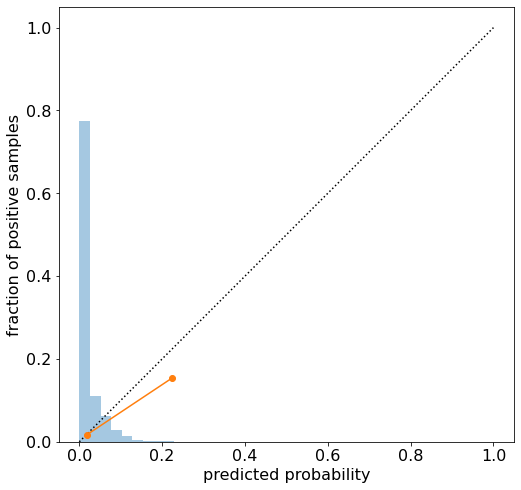

In [17]:
plot_calibration_curve(y_test, lr_proba[:, 1]);

In [18]:
from sklearn.metrics import brier_score_loss

In [19]:
lr_brier = brier_score_loss(y_test, lr_proba[:, 1])

Text(0.5, 1.0, 'n_bins=30')

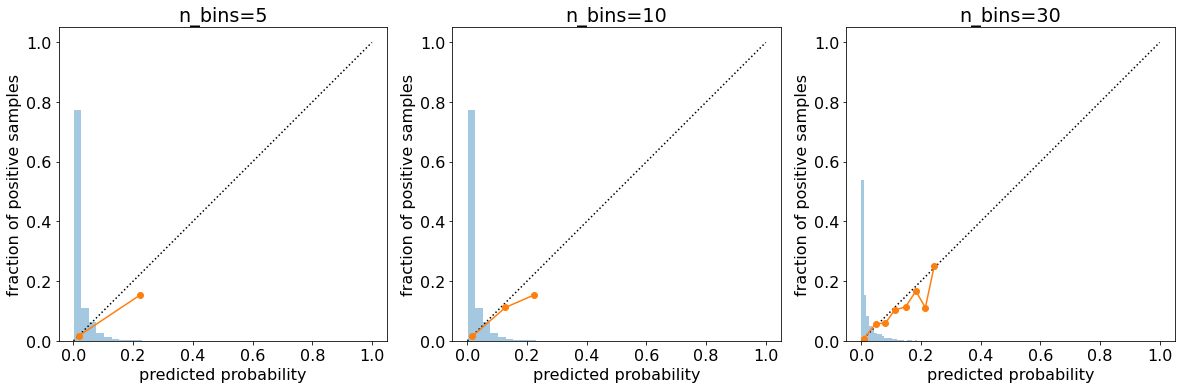

In [20]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 8))
plot_calibration_curve(y_test, lr_proba[:, 1], n_bins=5, ax=ax1)
ax1.set_title("n_bins=5")
plot_calibration_curve(y_test, lr_proba[:, 1], n_bins=10, ax=ax2)
ax2.set_title("n_bins=10")
plot_calibration_curve(y_test, lr_proba[:, 1], n_bins=30, ax=ax3)
ax3.set_title("n_bins=30")

### Train Random Forest

In [21]:
from sklearn.ensemble import RandomForestClassifier

In [22]:
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [23]:
rf_proba = rf.predict_proba(X_test)

In [24]:
rf_brier = brier_score_loss(y_test, rf_proba[:, 1])
rf_brier

0.0188862960924601

### Train Single Tree

In [25]:
from sklearn.tree import DecisionTreeClassifier

In [26]:
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [27]:
tree_proba = tree.predict_proba(X_test)

In [28]:
tree_brier = brier_score_loss(y_test, tree_proba[:, 1])
tree_brier

0.03880022014309301

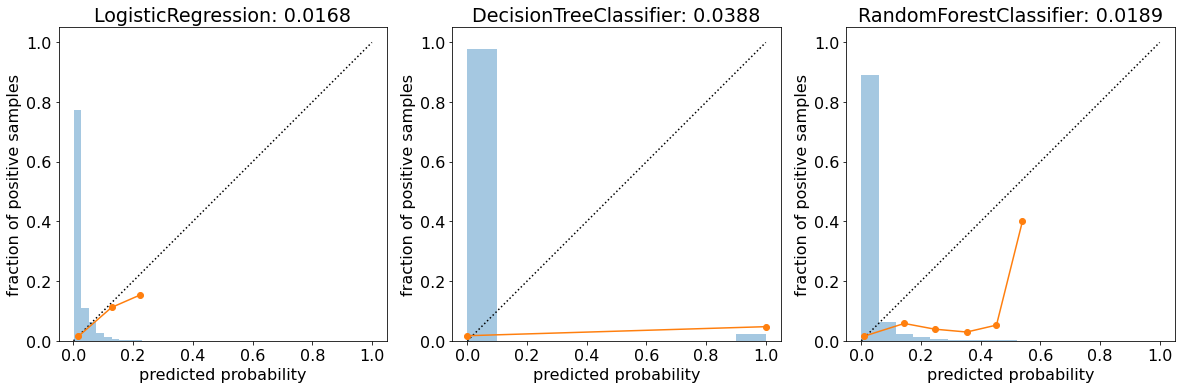

In [29]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 8))
plot_calibration_curve(y_test, lr_proba[:, 1], n_bins=10, ax=ax1)
ax1.set_title(f"LogisticRegression: {lr_brier:0.4f}")
plot_calibration_curve(y_test, tree_proba[:, 1], n_bins=10, ax=ax2)
ax2.set_title(f"DecisionTreeClassifier: {tree_brier:0.4f}")
plot_calibration_curve(y_test, rf_proba[:, 1], n_bins=10, ax=ax3)
ax3.set_title(f"RandomForestClassifier: {rf_brier:0.4f}");

## Exercise 1

1. Train a `sklearn.naive_bayes.GaussianNB` on the training set.
2. Compute the brier score loss on the test set for the `GuassianNB`.
3. Plot the calibration curve with `n_bins=10`.

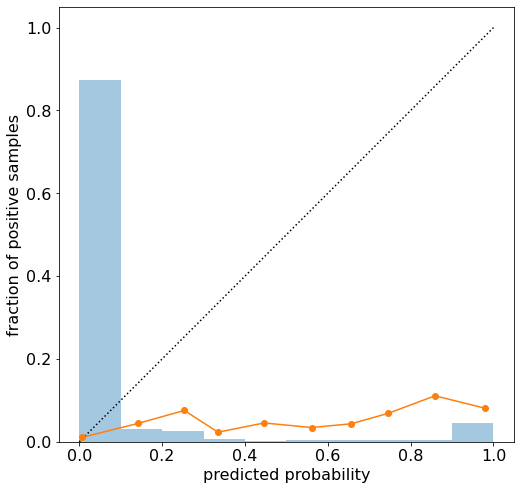

In [41]:
# %load solutions/02-ex01-solutions.py
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB().fit(X_train, y_train)

nb_proba = nb.predict_proba(X_test)

brier_score_loss(y_test, nb_proba[:, 1])

plot_calibration_curve(y_test, nb_proba[:, 1], n_bins=10)


## Calibration

In [31]:
from sklearn.calibration import CalibratedClassifierCV

In [32]:
rf = RandomForestClassifier(random_state=0)
cal_rf = CalibratedClassifierCV(rf, method="isotonic")
cal_rf.fit(X_train, y_train)

CalibratedClassifierCV(base_estimator=RandomForestClassifier(random_state=0),
                       method='isotonic')

In [33]:
cal_rf_proba = cal_rf.predict_proba(X_test)

In [34]:
cal_rf_brier = brier_score_loss(y_test, cal_rf_proba[:, 1])

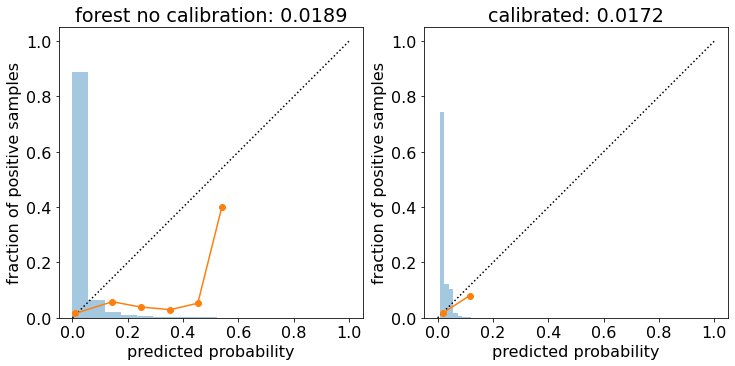

In [35]:
fig, (ax1, ax2) = plt.subplots(1, 2)
plot_calibration_curve(y_test, rf_proba[:, 1], ax=ax1, n_bins=10)
ax1.set_title(f"forest no calibration: {rf_brier:0.4f}")
plot_calibration_curve(y_test, cal_rf_proba[:, 1], ax=ax2, n_bins=10)
ax2.set_title(f"calibrated: {cal_rf_brier:0.4f}");

### Calibrating the linear model

In [36]:
lr = make_pipeline(StandardScaler(), LogisticRegression(random_state=42))
cal_lr = CalibratedClassifierCV(lr, method='isotonic')
cal_lr.fit(X_train, y_train)

CalibratedClassifierCV(base_estimator=Pipeline(steps=[('standardscaler',
                                                       StandardScaler()),
                                                      ('logisticregression',
                                                       LogisticRegression(random_state=42))]),
                       method='isotonic')

In [37]:
cal_lr_proba = cal_lr.predict_proba(X_test)

cal_lr_brier = brier_score_loss(y_test, cal_lr_proba[:, 1])

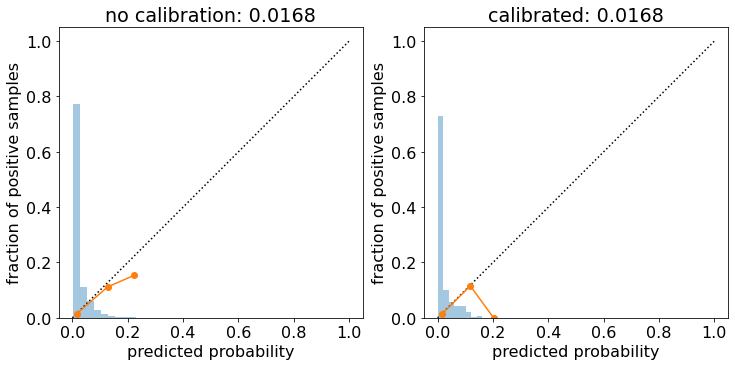

In [38]:
fig, (ax1, ax2) = plt.subplots(1, 2)
plot_calibration_curve(y_test, lr_proba[:, 1], ax=ax1, n_bins=10)
ax1.set_title(f"no calibration: {lr_brier:0.4f}")
plot_calibration_curve(y_test, cal_lr_proba[:, 1], ax=ax2, n_bins=10)
ax2.set_title(f"calibrated: {cal_lr_brier:0.4f}");